In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('30_Auto_theft.csv')

In [3]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946


Lets rename the columns as per our significance

In [4]:
df = df.rename(columns={'Area_Name':'Area'})

In [5]:
df = df.rename(columns={'Group_Name':'Group','Sub_Group_Name':'Sub_Group'})

In [6]:
df = df.rename(columns={'Auto_Theft_Coordinated/Traced':'Theft_Traced','Auto_Theft_Recovered':'Auto_Rec','Auto_Theft_Stolen':'Auto_Stolen'})

In [7]:
df.Group.nunique()

6

In [8]:
df.Group.unique()

array(['AT1-Motor Cycles/ Scooters', 'AT2-Motor Car/Taxi/Jeep',
       'AT3-Buses', 'AT4-Goods carrying vehicles (Trucks/Tempo etc)',
       'AT5-Other Motor vehicles', 'AT6-Total'], dtype=object)

In [9]:
df.Sub_Group.nunique()

6

In [10]:
df.Sub_Group.unique()

array(['1. Motor Cycles/ Scooters', '2. Motor Car/Taxi/Jeep', '3. Buses',
       '4. Goods carrying vehicles (Trucks/Tempo etc)',
       '5. Other Motor vehicles', '6. Total (Sum of 1-5 Above)'],
      dtype=object)

It seems that both group and sub groups ae having same records. Hence dropping one column

In [11]:
df = df.drop('Sub_Group',1)

In [12]:
df['Group'] = df['Group'].replace({'AT1-Motor Cycles/ Scooters':'Scooters','AT2-Motor Car/Taxi/Jeep':'Car_Taxi_Jeep',
                                  'AT3-Buses':'Buses','AT4-Goods carrying vehicles (Trucks/Tempo etc)':'Goods_Carrying_Vehicles',
                                   'AT5-Other Motor vehicles':'Others', 'AT6-Total':'Total'})

In [13]:
df.drop(df[df['Group'] == 'Total'].index,inplace = True)

In [14]:
df.shape

(1521, 6)

In [15]:
df = df.fillna(0)

In [16]:
df['Area'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Daman & Diu', 'Lakshadweep'],
      dtype=object)

In [17]:
df['Area']=df['Area'].replace(to_replace=['Andaman & Nicobar Islands','Dadra & Nagar Haveli', 'Daman & Diu','Lakshadweep','Puducherry'],value='NT')
df['Area']=df['Area'].replace(to_replace=['Karnataka', 'Kerala','Tamil Nadu','Andhra Pradesh'],value='South')
df['Area']=df['Area'].replace(to_replace=['Chandigarh','Delhi','Haryana', 'Himachal Pradesh', 'Jammu & Kashmir','Punjab','Uttar Pradesh', 'Uttarakhand'],value='North')
df['Area']=df['Area'].replace(to_replace=['Arunachal Pradesh','Assam','Manipur', 'Meghalaya', 'Mizoram','Nagaland','Sikkim','Tripura','West Bengal'],value='East')
df['Area']=df['Area'].replace(to_replace=['Goa','Gujarat','Maharashtra','Rajasthan'],value='West')
df['Area']=df['Area'].replace(to_replace=['Chhattisgarh','Madhya Pradesh','Odisha','Bihar','Jharkhand'],value='Central')

In [18]:
df.head()

,Area,Year,Group,Theft_Traced,Auto_Rec,Auto_Stolen
0,NT,2001,Scooters,0.0,4.0,4
1,South,2001,Scooters,136.0,1311.0,2725
2,East,2001,Scooters,0.0,21.0,27
3,East,2001,Scooters,0.0,94.0,205
4,Central,2001,Scooters,44.0,205.0,946


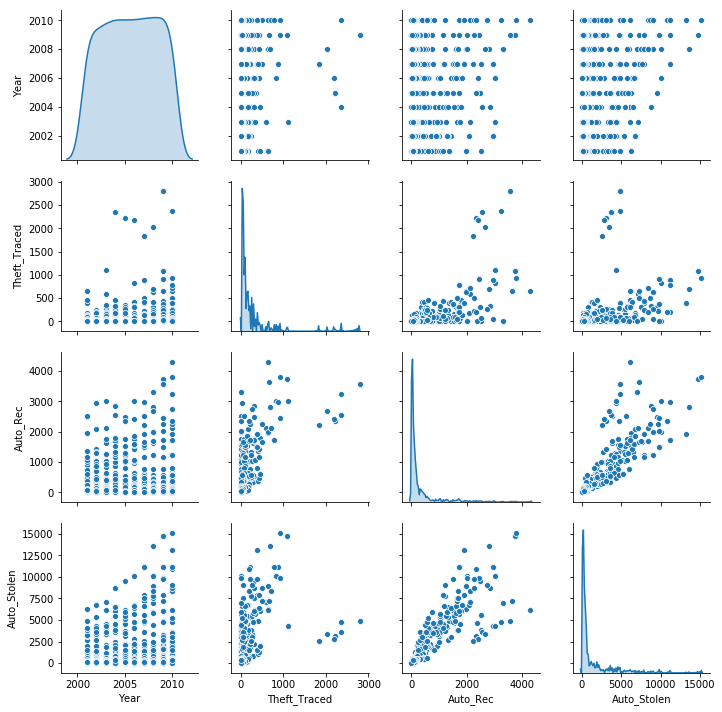

In [19]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 0 to 1520
Data columns (total 6 columns):
Area            1521 non-null object
Year            1521 non-null int64
Group           1521 non-null object
Theft_Traced    1521 non-null float64
Auto_Rec        1521 non-null float64
Auto_Stolen     1521 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 123.2+ KB


In [21]:
df.drop(df[df['Auto_Stolen']==0].index,inplace=True)

In [22]:
df['Theft_Traced'] = df['Theft_Traced'].astype('int64')
df['Auto_Rec'] = df['Auto_Rec'].astype('int64')

In [23]:
df.head()

,Area,Year,Group,Theft_Traced,Auto_Rec,Auto_Stolen
0,NT,2001,Scooters,0,4,4
1,South,2001,Scooters,136,1311,2725
2,East,2001,Scooters,0,21,27
3,East,2001,Scooters,0,94,205
4,Central,2001,Scooters,44,205,946


In [24]:
df2 = pd.DataFrame(df.groupby(['Group'])['Auto_Stolen'].sum())

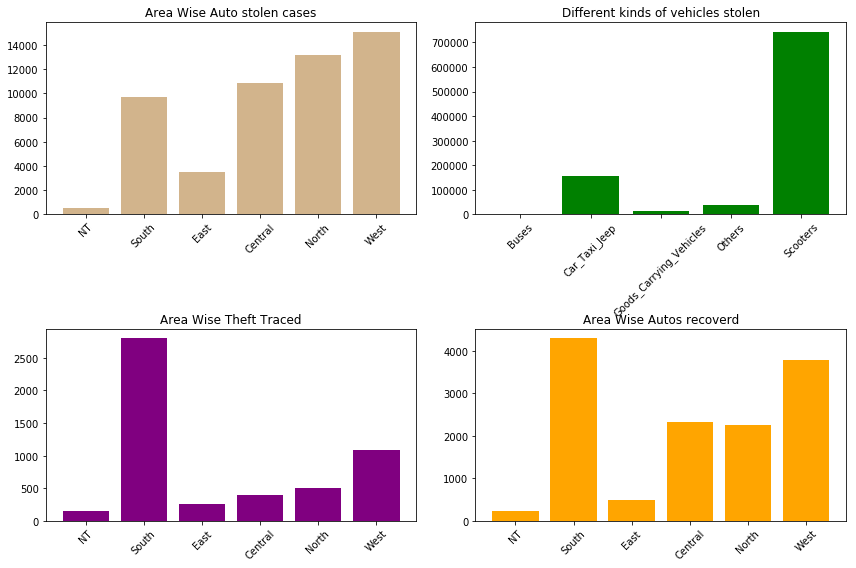

In [25]:
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.bar(df['Area'],df['Auto_Stolen'],color='tan')
plt.title('Area Wise Auto stolen cases')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(222)
plt.bar(df2.index,df2['Auto_Stolen'],color='green')
plt.title('Different kinds of vehicles stolen')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(223)
plt.bar(df['Area'],df['Theft_Traced'],color='purple')
plt.title('Area Wise Theft Traced')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(224)
plt.bar(df['Area'],df['Auto_Rec'],color='orange')
plt.title('Area Wise Autos recoverd')
plt.xticks(rotation=45)

plt.show()

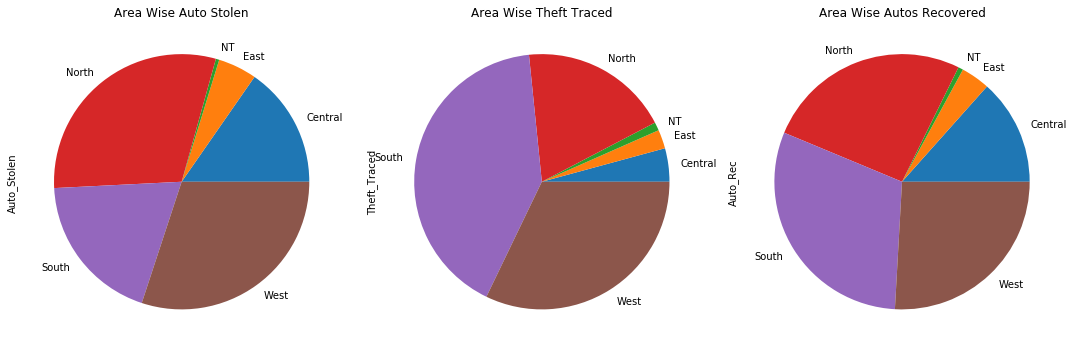

In [26]:
plt.figure(figsize=(15,6))

plt.subplot(131)
df.groupby(['Area'])['Auto_Stolen'].sum().plot(kind='pie')
plt.title('Area Wise Auto Stolen')
plt.tight_layout()

plt.subplot(132)
df.groupby(['Area'])['Theft_Traced'].sum().plot(kind='pie')
plt.title('Area Wise Theft Traced')
plt.tight_layout()

plt.subplot(133)
df.groupby(['Area'])['Auto_Rec'].sum().plot(kind='pie')
plt.title('Area Wise Autos Recovered')
plt.tight_layout()

plt.show()

In [27]:
df['Year'] = df['Year'].astype('category')

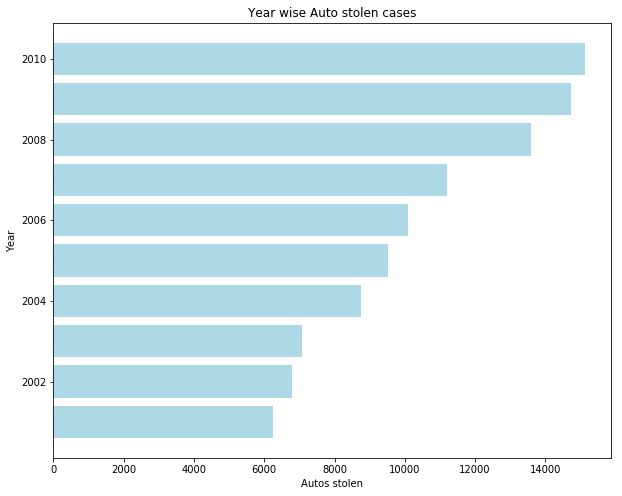

In [28]:
plt.figure(figsize=(10,8))
plt.barh(df['Year'],df['Auto_Stolen'],color='lightblue')
plt.xlabel('Autos stolen')
plt.ylabel('Year')
plt.title('Year wise Auto stolen cases')
plt.show()

In [99]:
bar1 = df.groupby('Area')['Auto_Stolen'].sum()
bar2 = df.groupby('Area')['Auto_Rec'].sum()

In [100]:
r = ['Central','East','NT','North','South','West']

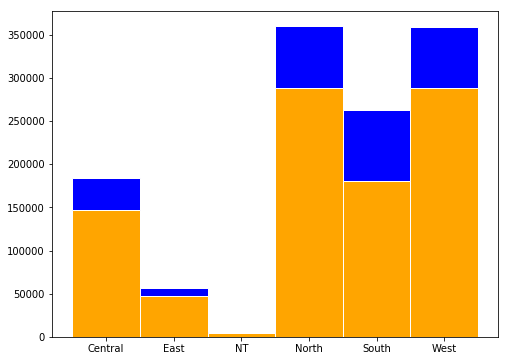

In [101]:
plt.figure(figsize=(8,6))
plt.bar(r, bar1, color='Orange', edgecolor='white', width=1)
plt.bar(r, np.array(bar2), bottom=np.array(bar1), color='Blue', edgecolor='white', width=1)
plt.show()

# Zonal Analysis

### East Zone

In [32]:
zone = df.groupby('Area')
east = zone.get_group('East')

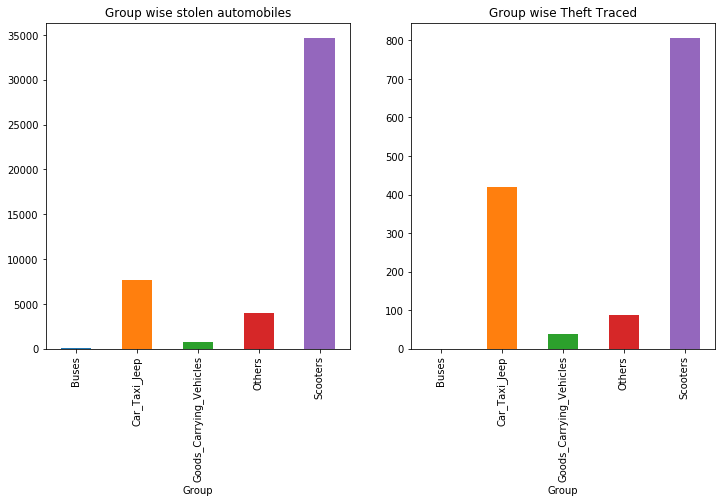

In [33]:
plt.figure(figsize=(12,6))

plt.subplot(121)
east.groupby('Group')['Auto_Stolen'].sum().plot(kind='bar')
plt.title('Group wise stolen automobiles')

plt.subplot(122)
east.groupby('Group')['Theft_Traced'].sum().plot(kind='bar')
plt.title('Group wise Theft Traced')

plt.show()

In [34]:
st = east.groupby('Year')['Auto_Stolen'].sum()
re = east.groupby('Year')['Auto_Rec'].sum()
main=pd.concat([st,re],axis=1)

In [35]:
r = list(range(2001,2011))

In [36]:
main['Not_Rec'] = main['Auto_Stolen'] - main['Auto_Rec']

In [37]:
totals = [i+j for i,j in zip(main['Auto_Rec'], main['Not_Rec'])]
Rec = [i / j * 100 for i,j in zip(main['Auto_Rec'], totals)]
Not_Rec = [i / j * 100 for i,j in zip(main['Not_Rec'], totals)]

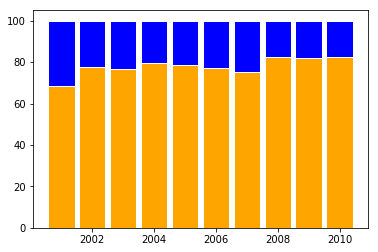

In [38]:
plt.bar(r, Not_Rec, color='Orange', edgecolor='white', width=0.85)
plt.bar(r, Rec, bottom=Not_Rec, color='Blue', edgecolor='white', width=0.85)
plt.show()

### West Zone

In [39]:
west = zone.get_group('West')

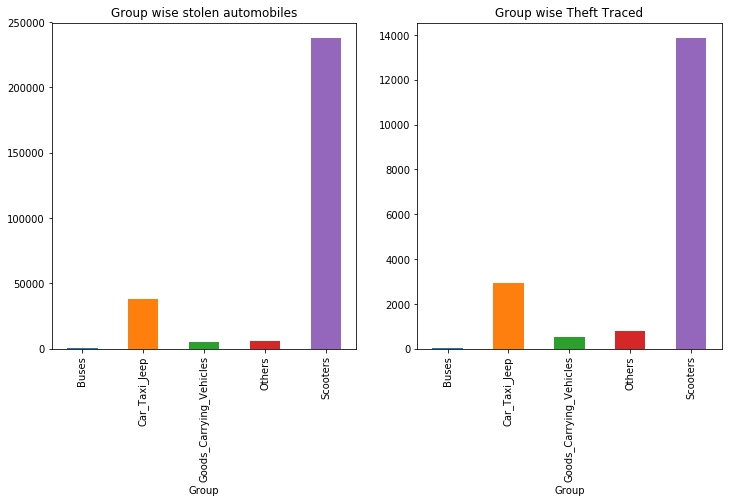

In [40]:
plt.figure(figsize=(12,6))

plt.subplot(121)
west.groupby('Group')['Auto_Stolen'].sum().plot(kind='bar')
plt.title('Group wise stolen automobiles')

plt.subplot(122)
west.groupby('Group')['Theft_Traced'].sum().plot(kind='bar')
plt.title('Group wise Theft Traced')

plt.show()

In [41]:
st = west.groupby('Year')['Auto_Stolen'].sum()
re = west.groupby('Year')['Auto_Rec'].sum()
main=pd.concat([st,re],axis=1)

In [42]:
main['Not_Rec'] = main['Auto_Stolen'] - main['Auto_Rec']

In [43]:
totals = [i+j for i,j in zip(main['Auto_Rec'], main['Not_Rec'])]
Rec = [i / j * 100 for i,j in zip(main['Auto_Rec'], totals)]
Not_Rec = [i / j * 100 for i,j in zip(main['Not_Rec'], totals)]

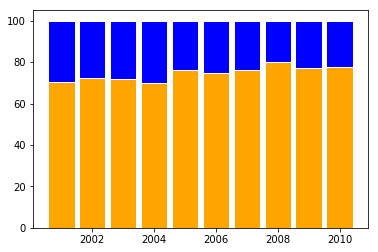

In [44]:
plt.bar(r, Not_Rec, color='Orange', edgecolor='white', width=0.85)
plt.bar(r, Rec, bottom=Not_Rec, color='Blue', edgecolor='white', width=0.85)
plt.show()

### North Zone

In [45]:
north = zone.get_group('North')

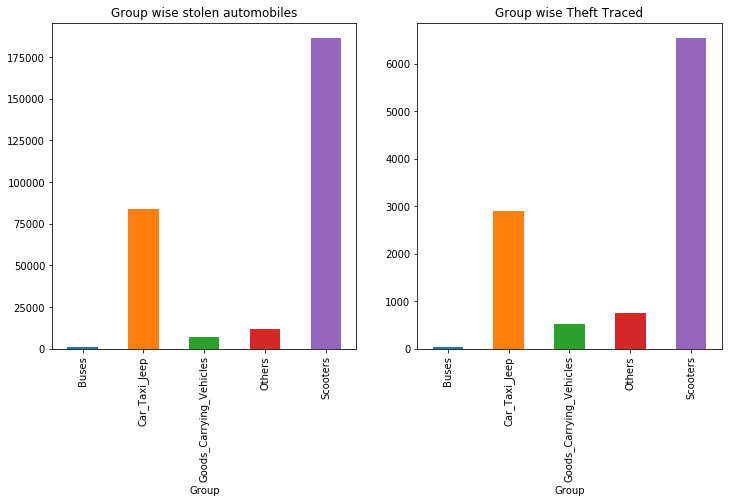

In [46]:
plt.figure(figsize=(12,6))

plt.subplot(121)
north.groupby('Group')['Auto_Stolen'].sum().plot(kind='bar')
plt.title('Group wise stolen automobiles')

plt.subplot(122)
north.groupby('Group')['Theft_Traced'].sum().plot(kind='bar')
plt.title('Group wise Theft Traced')

plt.show()

In [47]:
st = north.groupby('Year')['Auto_Stolen'].sum()
re = north.groupby('Year')['Auto_Rec'].sum()
main=pd.concat([st,re],axis=1)

In [48]:
main['Not_Rec'] = main['Auto_Stolen'] - main['Auto_Rec']

In [49]:
totals = [i+j for i,j in zip(main['Auto_Rec'], main['Not_Rec'])]
Rec = [i / j * 100 for i,j in zip(main['Auto_Rec'], totals)]
Not_Rec = [i / j * 100 for i,j in zip(main['Not_Rec'], totals)]

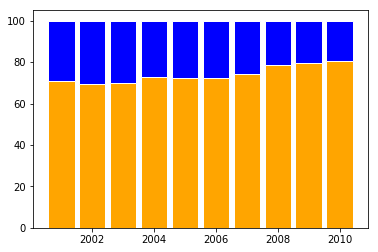

In [50]:
plt.bar(r, Not_Rec, color='Orange', edgecolor='white', width=0.85)
plt.bar(r, Rec, bottom=Not_Rec, color='Blue', edgecolor='white', width=0.85)
plt.show()

### South Zone

In [51]:
south = zone.get_group('South')

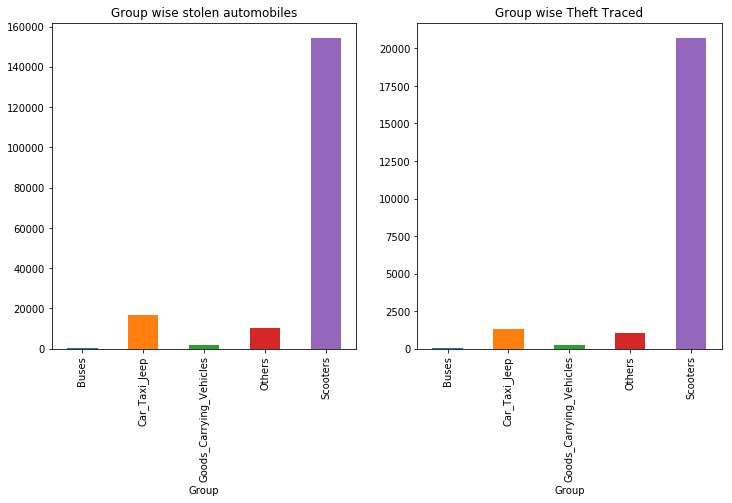

In [52]:
plt.figure(figsize=(12,6))

plt.subplot(121)
south.groupby('Group')['Auto_Stolen'].sum().plot(kind='bar')
plt.title('Group wise stolen automobiles')

plt.subplot(122)
south.groupby('Group')['Theft_Traced'].sum().plot(kind='bar')
plt.title('Group wise Theft Traced')

plt.show()

In [53]:
st = south.groupby('Year')['Auto_Stolen'].sum()
re = south.groupby('Year')['Auto_Rec'].sum()
main=pd.concat([st,re],axis=1)

In [54]:
main['Not_Rec'] = main['Auto_Stolen'] - main['Auto_Rec']

In [55]:
totals = [i+j for i,j in zip(main['Auto_Rec'], main['Not_Rec'])]
Rec = [i / j * 100 for i,j in zip(main['Auto_Rec'], totals)]
Not_Rec = [i / j * 100 for i,j in zip(main['Not_Rec'], totals)]

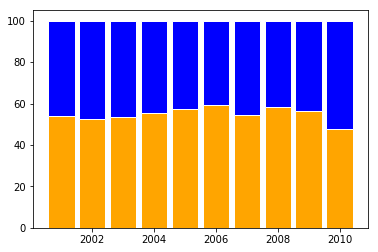

In [56]:
plt.bar(r, Not_Rec, color='Orange', edgecolor='white', width=0.85)
plt.bar(r, Rec, bottom=Not_Rec, color='Blue', edgecolor='white', width=0.85)
plt.show()

In [160]:
df.columns

Index(['Area', 'Year', 'Group', 'Theft_Traced', 'Auto_Rec', 'Auto_Stolen'], dtype='object')

In [161]:
X = df.loc[:,['Area', 'Year', 'Group', 'Theft_Traced', 'Auto_Stolen']]

y = df['Auto_Rec']

In [162]:
X_categorical = X.select_dtypes(include=['object'])
X_categorical.head()

,Area,Year,Group
4,Central,2001-04,Scooters
5,North,2001-04,Scooters
6,Central,2001-04,Scooters
7,NT,2001-04,Scooters
8,North,2001-04,Scooters


In [163]:
df_dummies = pd.get_dummies(X_categorical)
df_dummies.head()

,Area_Central,Area_East,Area_NT,Area_North,Area_South,Area_West,Year_2001-04,Year_2005-07,Year_2008-10,Group_Buses,Group_Car_Taxi_Jeep,Group_Goods_Carrying_Vehicles,Group_Others,Group_Scooters
4,1,0,0,0,0,0,1,0,0,0,0,0,0,1
5,0,0,0,1,0,0,1,0,0,0,0,0,0,1
6,1,0,0,0,0,0,1,0,0,0,0,0,0,1
7,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [164]:
X = X.drop(list(X_categorical.columns),1)

In [165]:
X = pd.concat([X,df_dummies],1)

In [166]:
from sklearn.preprocessing import scale

In [167]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                              test_size = 0.3, random_state=123)

In [177]:
X_train.columns

Index(['Theft_Traced', 'Auto_Stolen', 'Area_Central', 'Area_East', 'Area_NT',
       'Area_North', 'Area_South', 'Area_West', 'Year_2001-04', 'Year_2005-07',
       'Year_2008-10', 'Group_Buses', 'Group_Car_Taxi_Jeep',
       'Group_Goods_Carrying_Vehicles', 'Group_Others', 'Group_Scooters'],
      dtype='object')

In [169]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
y_pred = lr.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.8756847432990266


In [171]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [172]:
print('Mean_Squared_Error :' ,round(mse,4))
print('r_square_value :',round(r_squared,4))

Mean_Squared_Error : 28454.7852
r_square_value : 0.8757


In [176]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
model = ols("Auto_Rec ~ Area+Year+Group+Theft_Traced+Auto_Stolen", data=df).fit()
summary=model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:               Auto_Rec   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     791.2
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:43:37   Log-Likelihood:                -8837.0
No. Observations:                1346   AIC:                         1.770e+04
Df Residuals:                    1332   BIC:                         1.777e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [197]:
X_train_new = X_train[['Theft_Traced', 'Auto_Stolen', 'Area_Central', 'Area_South', 'Year_2001-04', 'Year_2008-10', 'Group_Buses', 'Group_Scooters']]
X_test_new = X_test[['Theft_Traced', 'Auto_Stolen', 'Area_Central', 'Area_South', 'Year_2001-04', 'Year_2008-10', 'Group_Buses', 'Group_Scooters']]

In [198]:
lr.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [200]:
y_pred_new = lr.predict(X_test_new)

Text(0, 0.5, 'Sales')

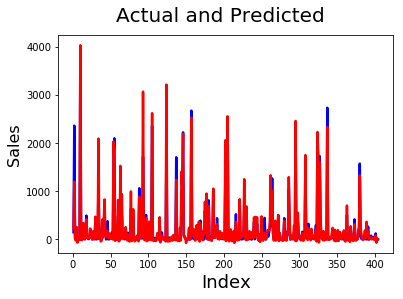

In [201]:
c = [i for i in range(1,405,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label

Text(0, 0.5, 'ytest-ypred')

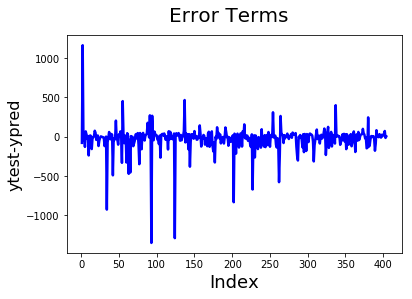

In [202]:
# Error terms
c = [i for i in range(1,405,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [203]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [205]:
print('Mean_Squared_Error :' ,round(mse,4))
print('r_square_value :',round(r_squared,4))

Mean_Squared_Error : 28054.9215
r_square_value : 0.8774


In [115]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse',random_state=123)

In [221]:
y_pred=dt.fit(X_train, y_train).predict(X_test)

In [222]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [223]:
print(mse)
print(r_squared)

22746.65099009901
0.9006228394696002


In [224]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='mse',random_state=123)

In [225]:
y_pred=rf.fit(X_train, y_train).predict(X_test)

In [226]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [227]:
print(mse)
print(r_squared)

18837.447887220093
0.9177016395298742


In [233]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=dt,random_state=123)

In [234]:
y_pred=br.fit(X_train, y_train).predict(X_test)

In [235]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [236]:
print(mse)
print(r_squared)

16958.29727972314
0.9259114041964753


Text(0, 0.5, 'ytest-ypred')

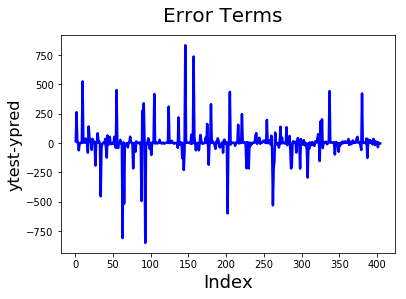

In [237]:
# Error terms
c = [i for i in range(1,405,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16) 

In [121]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(base_estimator=dt,random_state=123)

In [212]:
y_pred=ab.fit(X_train, y_train).predict(X_test)

In [213]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [214]:
print(mse)
print(r_squared)

22604.064455445543
0.9012457814996115


In [122]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(criterion = 'mse')

In [218]:
y_pred=gb.fit(X_train, y_train).predict(X_test)

In [219]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [220]:
print(mse)
print(r_squared)

19970.716680700843
0.9127505355250319
